In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [243]:
df=pd.read_csv("Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [245]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [246]:
# imputer=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
# imputer.fit(df.iloc[:,5:6].values)
# df.iloc[:,5:6]=imputer.transform(df.iloc[:,5:6].values)
# print(df)
# df.isnull().value_counts()

In [247]:
df.dropna(inplace=True)


In [248]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []


#### EDA

#### Encoding Categorical Labels

In [249]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Education Level"]=le.fit_transform(df["Education Level"])
df["Job Title"]=le.fit_transform(df["Job Title"])

In [250]:
df["Gender"]

0      1
1      0
2      1
3      0
4      1
      ..
370    0
371    1
372    0
373    1
374    0
Name: Gender, Length: 373, dtype: int64

<Axes: >

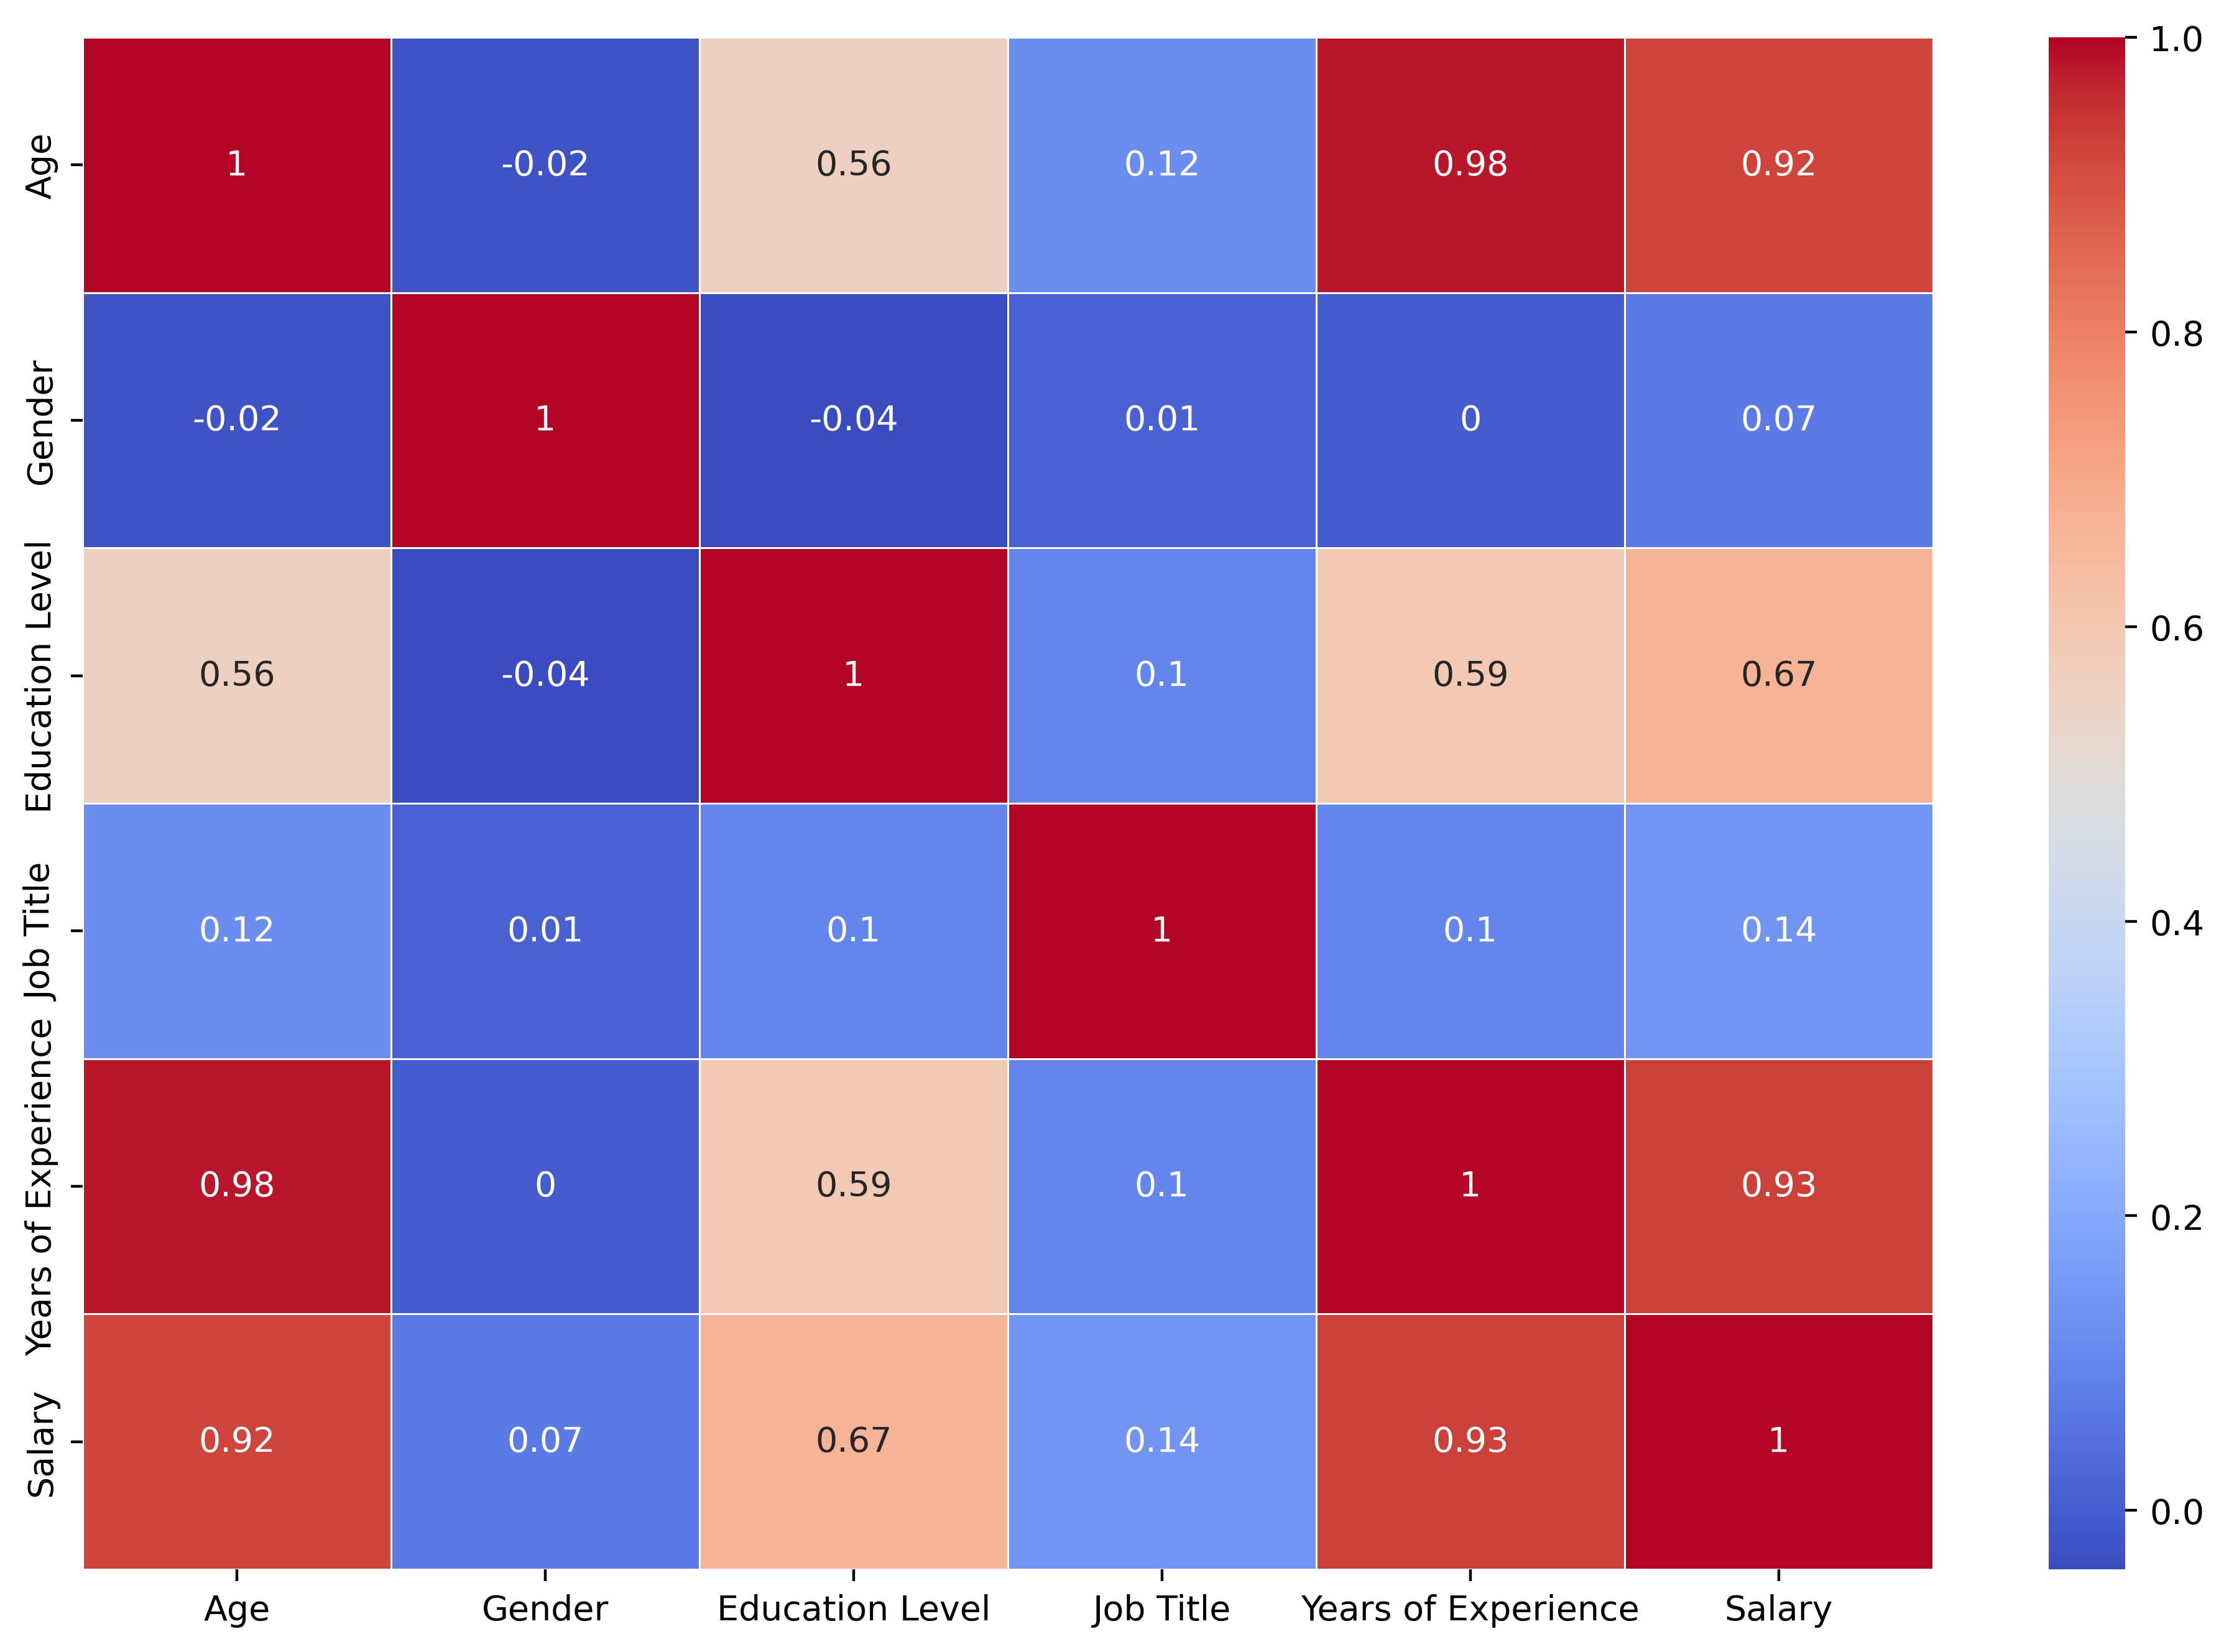

In [251]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

#### A strong correlation between Age and Salary can be found according to the heat map with a correlation coefficient of 0.92. Additionally, the correlation between Years of experience and Age is 0.93, indicating a strong correlation.

In [252]:
print(min(df["Age"]))
print(max(df["Age"]))

23.0
53.0


In [253]:
print(min(df["Years of Experience"]))
print(max(df["Years of Experience"]))

0.0
25.0


In [254]:
print(min(df["Job Title"]))
print(max(df["Job Title"]))

0
173


In [255]:
print(min(df["Salary"]))
print(max(df["Salary"]))

350.0
250000.0


#### Normalization proceeded to generalize the scale of each category to  equalize the representation of each number.

In [256]:
scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: >

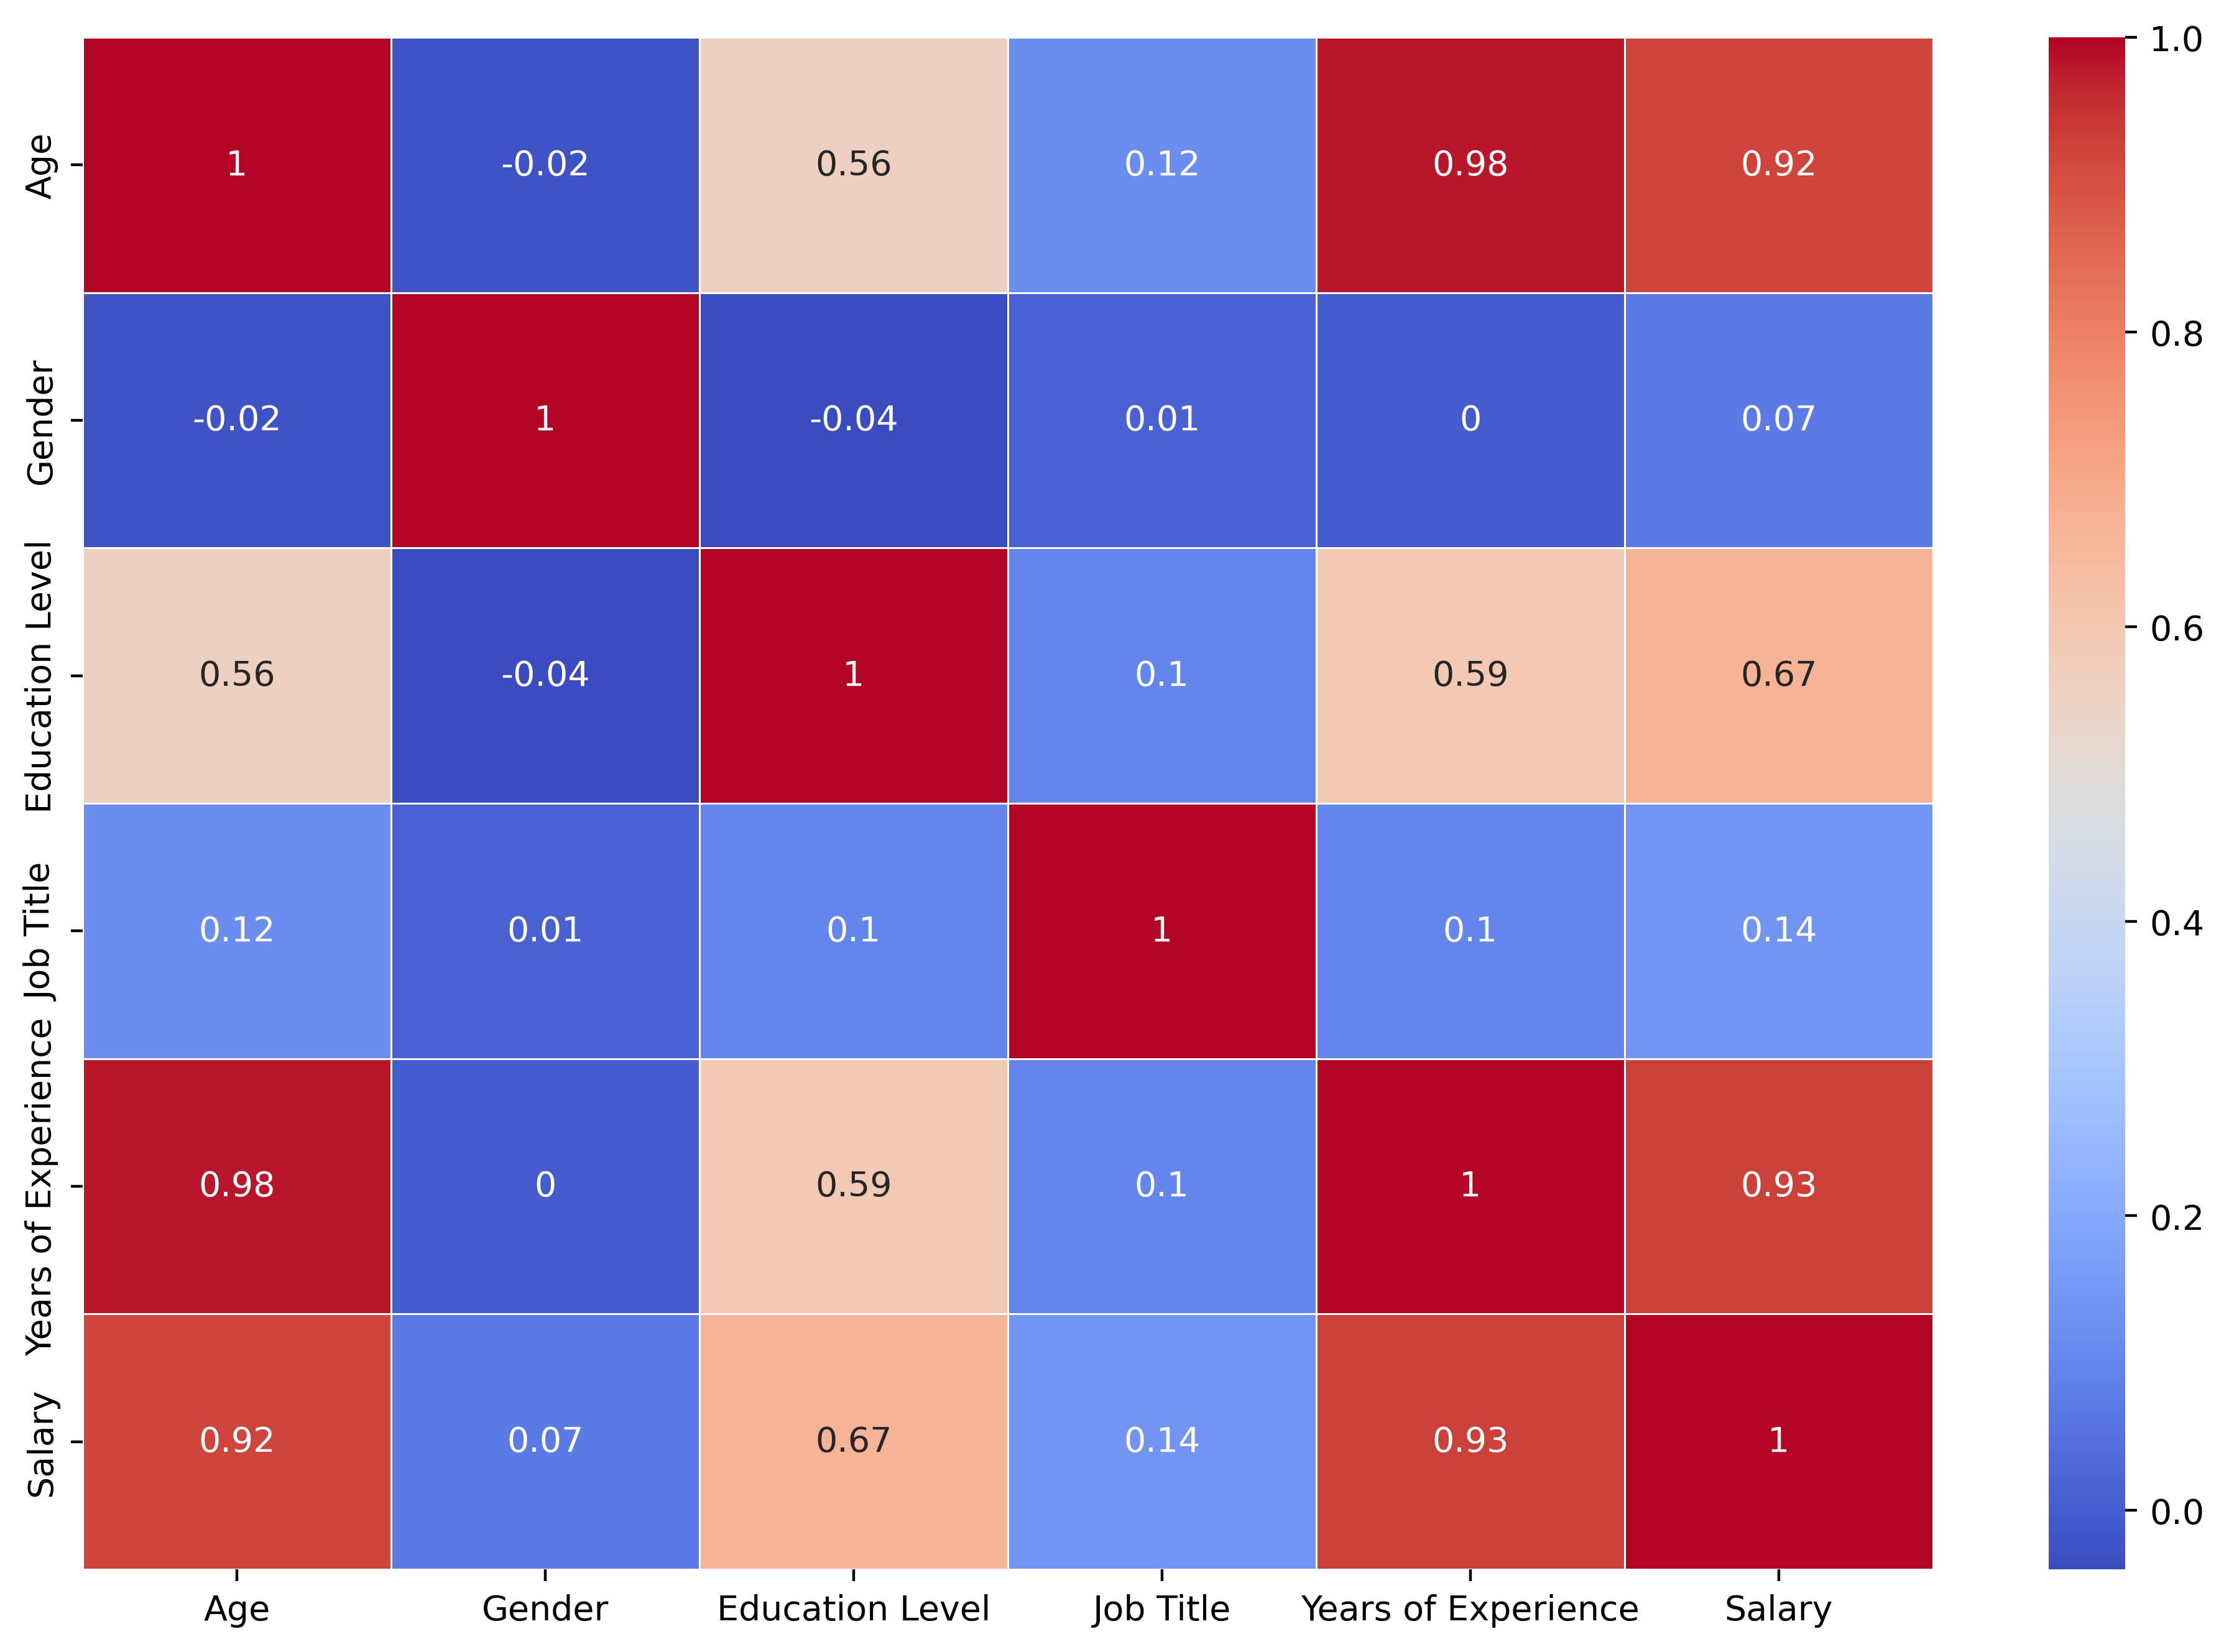

In [257]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

#### Finding the outliers to minimize the impact of outliers, increasing the accuracy of the result.

<Axes: ylabel='Age'>

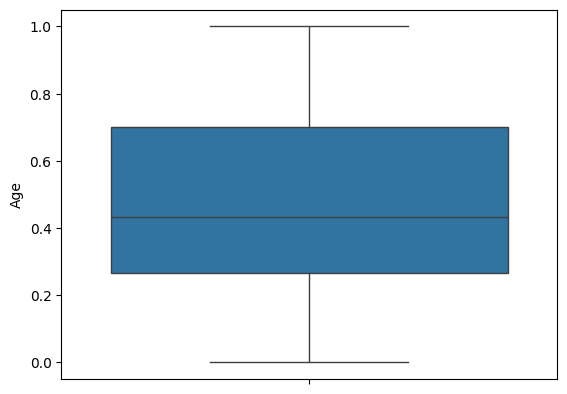

In [258]:
sns.boxplot(df["Age"])

<Axes: ylabel='Years of Experience'>

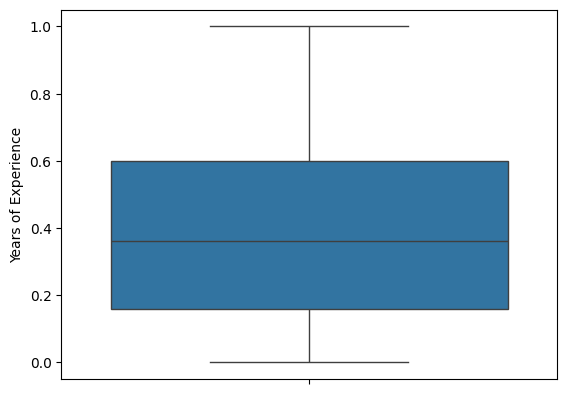

In [259]:
sns.boxplot(df["Years of Experience"])

<Axes: ylabel='Salary'>

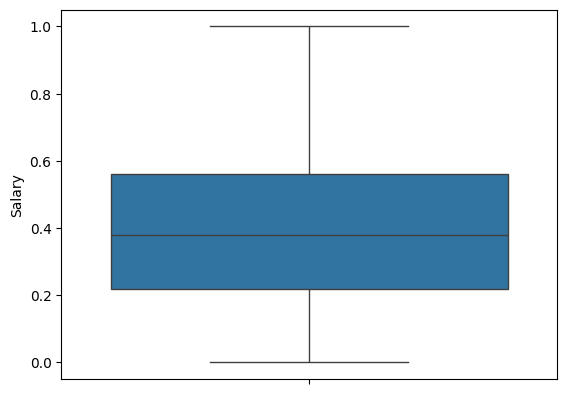

In [260]:
sns.boxplot(df["Salary"])

#### Training and Testing Model

In [261]:
X=df.drop("Salary",axis=1)
y=df["Salary"]
print(y)

0      0.359103
1      0.258963
2      0.599439
3      0.238935
4      0.799720
         ...   
368    0.339075
369    0.679551
370    0.158822
371    0.359103
372    0.599439
Name: Salary, Length: 373, dtype: float64


In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42, shuffle=True)

#### Linear Regression

In [284]:
model = LinearRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)

In [285]:
r2=r2_score(y_test,ypred)
rmse=mean_squared_error(y_test,ypred)**0.5
print("r2: ",r2,"rmse: ",rmse)

r2:  0.9260854123844132 rmse:  0.04962812537721444


In [286]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
r2=r2_score(y_test,ypred)
rmse=mean_squared_error(y_test,ypred)**0.5
print("r2: ",r2,"rmse: ",rmse)

r2:  0.9328956738645883 rmse:  0.04728659595691902
